In [18]:
# The code was removed by Watson Studio for sharing.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
# The code was removed by Watson Studio for sharing.

,SEVERITYCODE,X,Y,ADDRTYPE,LOCATION,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,...,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLDESC,HITPARKEDCAR,Location1,coordinates,county,dayofweek
0,2,-122.323148,47.703140,Intersection,5TH AVE NE AND NE 103RD ST,Injury Collision,Angles,2,0,0,...,0,Overcast,1,Daylight,Entering at angle,N,Seattle,"47.70314032,-122.32314840000002",King County,2
1,1,-122.347294,47.647172,Block,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Property Damage Only Collision,Sideswipe,2,0,0,...,0,Raining,1,Dark - Street Lights On,From same direction - both going straight - bo...,N,Seattle,"47.64717249,-122.3472943",King County,2
2,1,-122.334540,47.607871,Block,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Property Damage Only Collision,Parked Car,4,0,0,...,0,Overcast,0,Daylight,One parked--one moving,N,Seattle,"47.60787143,-122.33453999999999",King County,3
3,1,-122.334803,47.604803,Block,2ND AVE BETWEEN MARION ST AND MADISON ST,Property Damage Only Collision,Other,3,0,0,...,0,Clear,0,Daylight,From same direction - all others,N,Seattle,"47.60480289,-122.3348033",King County,4
4,2,-122.306426,47.545739,Intersection,SWIFT AVE S AND SWIFT AV OFF RP,Injury Collision,Angles,2,0,0,...,0,Raining,1,Daylight,Entering at angle,N,Seattle,"47.54573946,-122.3064263",King County,2


In [4]:
df['dayofweek'] = np.where((df.dayofweek == '0'),'Monday',df.dayofweek)

In [5]:
df['dayofweek'] = np.where((df.dayofweek == '1'),'Tuesday',df.dayofweek)
df['dayofweek'] = np.where((df.dayofweek == '2'),'Wednesday',df.dayofweek)
df['dayofweek'] = np.where((df.dayofweek == '3'),'Thursday',df.dayofweek)
df['dayofweek'] = np.where((df.dayofweek == '4'),'Friday',df.dayofweek)
df['dayofweek'] = np.where((df.dayofweek == '5'),'Saturday',df.dayofweek)
df['dayofweek'] = np.where((df.dayofweek == '6'),'Sunday',df.dayofweek)

In [6]:
df3 = df.groupby(['SEVERITYDESC']).count().reset_index()

In [7]:
df3.head()

,SEVERITYDESC,SEVERITYCODE,X,Y,ADDRTYPE,LOCATION,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,...,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLDESC,HITPARKEDCAR,Location1,coordinates,county,dayofweek
0,Injury Collision,55539,54711,54711,55539,55462,55527,55539,55539,55539,...,55539,55539,55539,55539,55527,55539,55539,55539,55539,55539
1,Property Damage Only Collision,113700,111498,111498,113700,113184,113695,113700,113700,113700,...,113700,113700,113700,113700,113695,113700,113700,113700,113700,113700


In [8]:
df3.drop(['X','Y','ADDRTYPE','LOCATION','COLLISIONTYPE', 'PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','county','coordinates','Location1','HITPARKEDCAR','ST_COLDESC','LIGHTCOND','ROADCOND','WEATHER'], axis=1, inplace=True)

In [9]:
df3.drop(['VEHCOUNT','INCDTTM','SDOT_COLDESC','UNDERINFL'], axis=1, inplace=True)


In [10]:
df3.rename(columns={'SEVERITYCODE':'Count'}, inplace=True)
df3.head()

,SEVERITYDESC,Count,dayofweek
0,Injury Collision,55539,55539
1,Property Damage Only Collision,113700,113700


In [11]:
df3=df3.set_index("SEVERITYDESC")


<function matplotlib.pyplot.show(*args, **kw)>

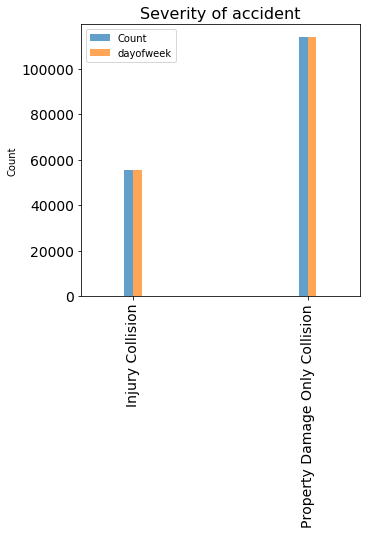

In [12]:
ax=df3.plot(kind='bar',fontsize = 14,edgecolor=None,width=0.1,alpha=0.7,figsize=(5, 5))
plt.title("Severity of accident",fontsize=16) 
plt.ylabel('Count')
plt.xlabel('')
plt.show

In [14]:
df["ADDRTYPE"].value_counts()

Block           107379
Intersection     61267
Alley              593
Name: ADDRTYPE, dtype: int64

In [16]:
# as alley does not have any data we need to drop those rows

df.drop(df[df['ADDRTYPE']=='Alley'].index,axis = 0, inplace = True)

In [19]:

project.save_data("Transform-Data.csv", data=df.to_csv(index=False),overwrite=True)

{'file_name': 'Transform-Data.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'corseracapstone-donotdelete-pr-xntjynexnacup6',
 'asset_id': '453bef29-120c-47ac-be34-e1c9b8368820'}

In [20]:
df4 = df.groupby(['SEVERITYDESC','ADDRTYPE']).count().reset_index()
df4.drop(['Y','LOCATION','COLLISIONTYPE', 'PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','county','coordinates','Location1','HITPARKEDCAR','ST_COLDESC','LIGHTCOND','ROADCOND','WEATHER'], axis=1, inplace=True)
df4.drop(['SEVERITYCODE','VEHCOUNT', 'INCDTTM','SDOT_COLDESC','UNDERINFL','dayofweek'], axis=1, inplace=True)
df4=df4.set_index("ADDRTYPE")
df4.head()

,SEVERITYDESC,X
ADDRTYPE,,
Block,Injury Collision,28004
Intersection,Injury Collision,26707
Block,Property Damage Only Collision,77239
Intersection,Property Damage Only Collision,34259


In [21]:
df4.rename(columns={'X':'Count'}, inplace=True)

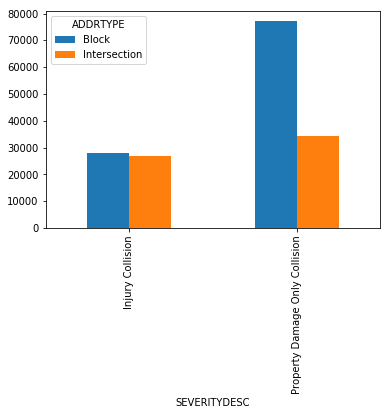

In [22]:
df.groupby(['ADDRTYPE','SEVERITYDESC'])['X'].count().unstack('ADDRTYPE').plot.bar()

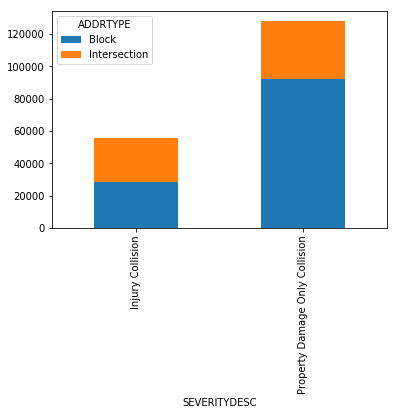

In [24]:
df.groupby(['SEVERITYDESC', 'ADDRTYPE']).size().unstack().plot(kind='bar', stacked=True)

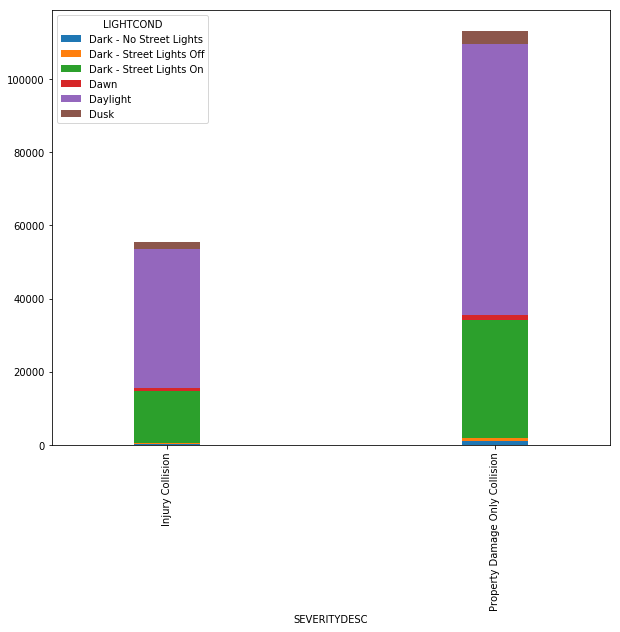

In [25]:
df.groupby(['SEVERITYDESC', 'LIGHTCOND']).size().unstack().plot(kind='bar', stacked=True,figsize=(10, 8),width=0.2)

In [30]:
df['ROADCOND'] = np.where((df.ROADCOND == 0 ),'Dry',df.ROADCOND)


In [37]:
df['ROADCOND'] = np.where((df.ROADCOND == '1' ),'Wet',df.ROADCOND)
df['ROADCOND'].value_counts()

Dry    120520
Wet     46011
2        1069
3         827
4         101
6          60
5          58
Name: ROADCOND, dtype: int64

In [38]:

df['ROADCOND'] = np.where((df.ROADCOND == '2' ),'Ice',df.ROADCOND)
df['ROADCOND'] = np.where((df.ROADCOND == '3' ),'Snow/Slush',df.ROADCOND)
df['ROADCOND'] = np.where((df.ROADCOND == '4' ),'Standing Water',df.ROADCOND)
df['ROADCOND'] = np.where((df.ROADCOND == '5' ),'Sand/Mud/Dirt',df.ROADCOND)
df['ROADCOND'] = np.where((df.ROADCOND == '6' ),'Oil',df.ROADCOND)
df['ROADCOND'].value_counts()

Dry               120520
Wet                46011
Ice                 1069
Snow/Slush           827
Standing Water       101
Oil                   60
Sand/Mud/Dirt         58
Name: ROADCOND, dtype: int64

In [39]:
project.save_data("Transform-Data.csv", data=df.to_csv(index=False),overwrite=True)

{'file_name': 'Transform-Data.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'corseracapstone-donotdelete-pr-xntjynexnacup6',
 'asset_id': '453bef29-120c-47ac-be34-e1c9b8368820'}

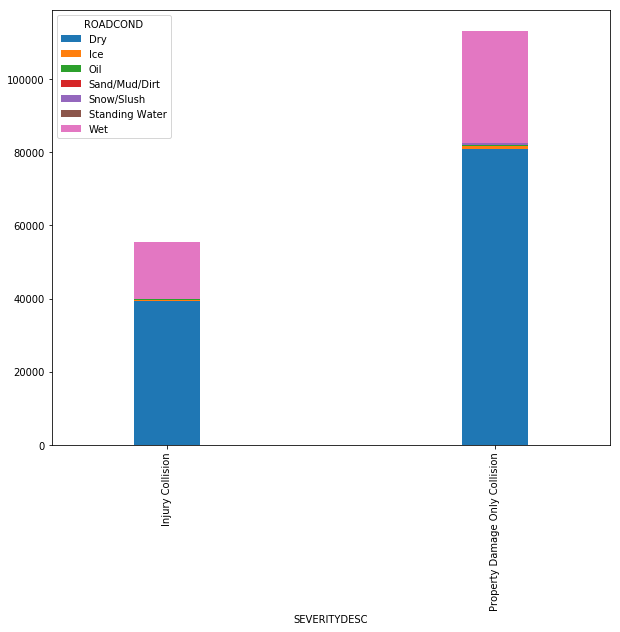

In [40]:
#df6 = df.groupby(['SEVERITYDESC','WEATHER']).count().reset_index()
#df6.head(20)
df.groupby(['SEVERITYDESC', 'ROADCOND']).size().unstack().plot(kind='bar', stacked=True,figsize=(10, 8),width=0.2)

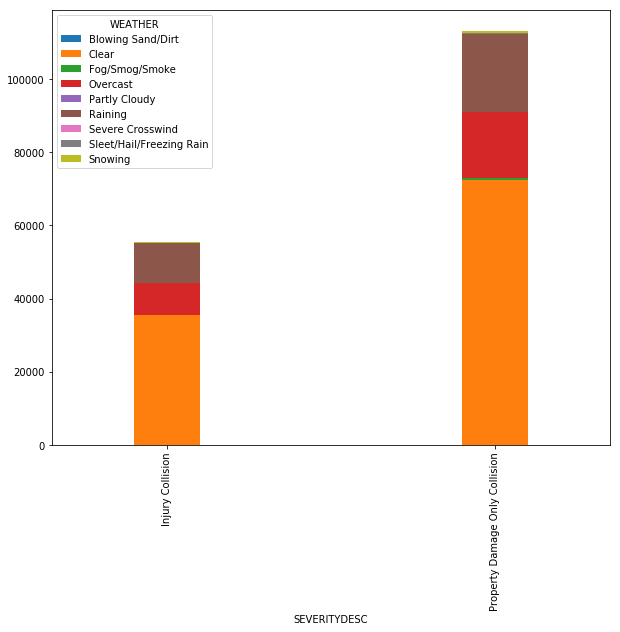

In [27]:
df.groupby(['SEVERITYDESC', 'WEATHER']).size().unstack().plot(kind='bar', stacked=True,figsize=(10, 8),width=0.2)

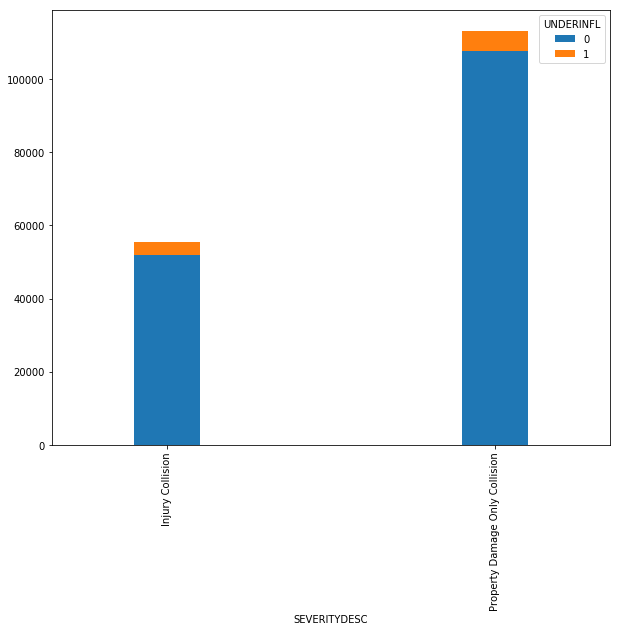

In [28]:
df.groupby(['SEVERITYDESC', 'UNDERINFL']).size().unstack().plot(kind='bar', stacked=True,figsize=(10, 8),width=0.2)

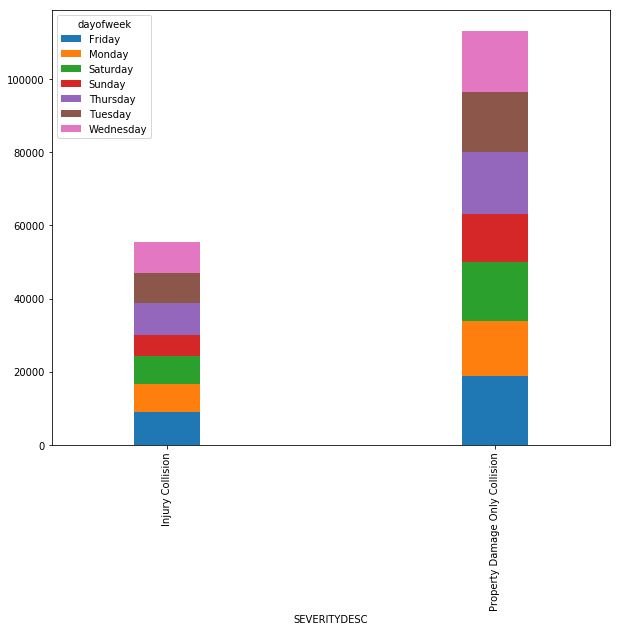

In [29]:
df.groupby(['SEVERITYDESC', 'dayofweek']).size().unstack().plot(kind='bar', stacked=True,figsize=(10, 8),width=0.2)